# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [135]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

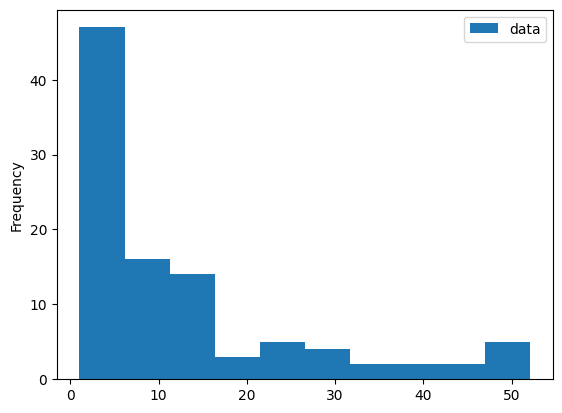

In [136]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

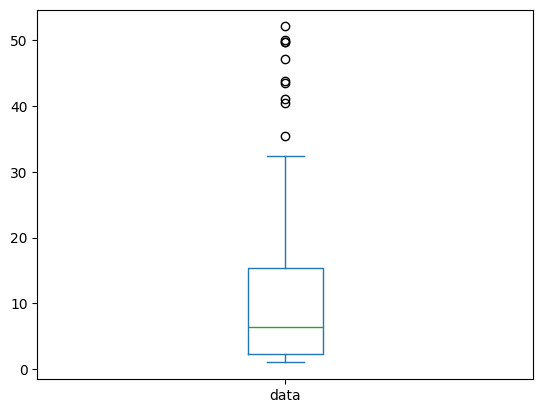

In [137]:
df.plot.box()

The histogram provides a good sense of the overall distribution of drug prices, showing how frequently different price ranges occur. However, it doesn’t clearly highlight specific percentiles or outliers. The boxplot, on the other hand, effectively summarizes key statistics like the median, quartiles, and outliers, making it easier to identify high-cost drugs.  

I would choose the boxplot since the administrator is particularly interested in expensive drugs. To improve clarity, I would adjust the formatting by adding labels, increasing font size, and possibly overlaying the 75th percentile value to emphasize the high-cost range.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [138]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/workspaces/2025-spring-B2/carclaims.csv')

# Display the first few rows
print(data.head())


  Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0          Jan                   1  Female        Single  ...   
1          Jan                   4    Male        Single  ...   
2          Nov                   2    Male       Married  ...   
3          Jul                   1    Male       Married  ...   
4          Feb                   2  Female        Single  ...   

   AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0           26 to 30                No             No  External   
1           31 to 35               Y

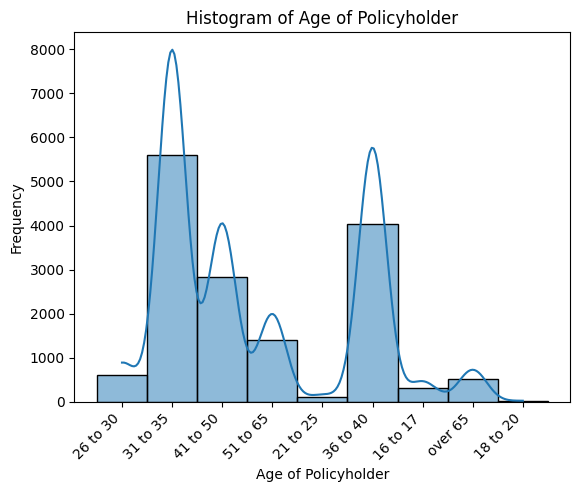

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw histogram for AgeOfPolicyHolder
sns.histplot(data['AgeOfPolicyHolder'], kde=True, bins=10)
plt.title('Histogram of Age of Policyholder')
plt.xlabel('Age of Policyholder')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()


In [140]:
age_categories = data['AgeOfPolicyHolder'].unique()
age_categories

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [141]:
age_counts = data['AgeOfPolicyHolder'].value_counts()
age_counts

AgeOfPolicyHolder
31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
26 to 30     613
over 65      508
16 to 17     320
21 to 25     108
18 to 20      15
Name: count, dtype: int64

In [142]:
#Midpoints for each age category
age_mapping = {
    '16 to 17': 16.5,
    '18 to 20': 19,
    '21 to 25': 23,
    '26 to 30': 28,
    '31 to 35': 33,
    '36 to 40': 38,
    '41 to 50': 45.5,
    '51 to 65': 58,
    'over 65': 70
}

#Map the 'AgeOfPolicyHolder' column to its midpoint values
data['AgeOfPolicyHolder_mid'] = data['AgeOfPolicyHolder'].map(age_mapping)

#Calculate mean, median, and mode
mean = data['AgeOfPolicyHolder_mid'].mean()
median = data['AgeOfPolicyHolder_mid'].median()
mode = data['AgeOfPolicyHolder_mid'].mode()[0]

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")


Mean: 39.454345006485084
Median: 38.0
Mode: 33.0


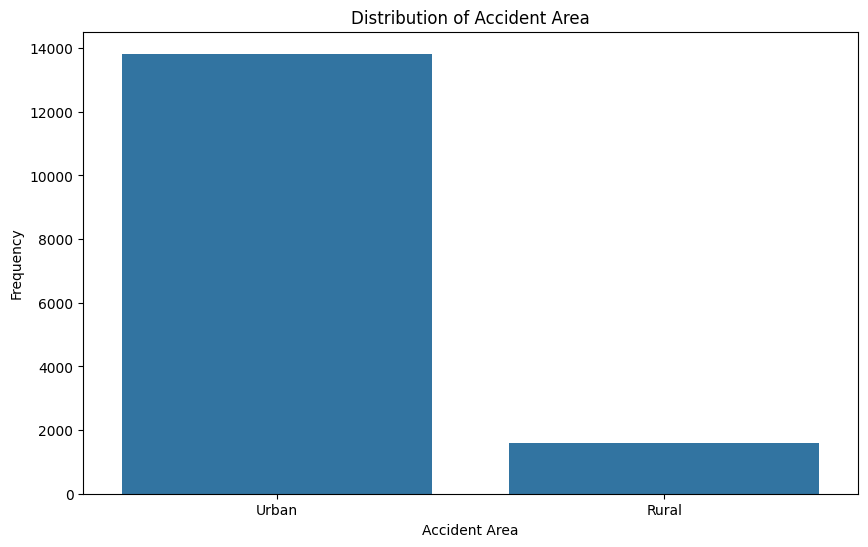

In [143]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='AccidentArea')
plt.title('Distribution of Accident Area')
plt.xlabel('Accident Area')
plt.ylabel('Frequency')
plt.show()


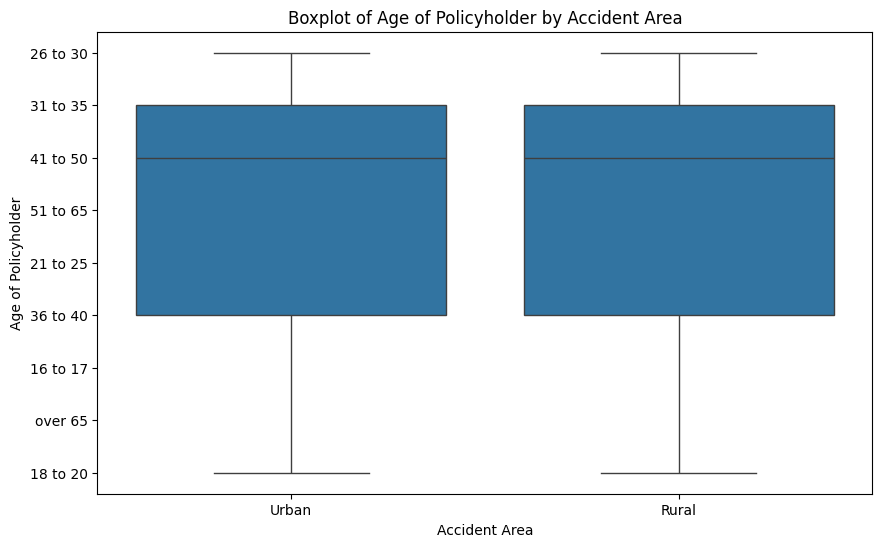

In [144]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='AccidentArea', y='AgeOfPolicyHolder')
plt.title('Boxplot of Age of Policyholder by Accident Area')
plt.xlabel('Accident Area')
plt.ylabel('Age of Policyholder')
plt.show()


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

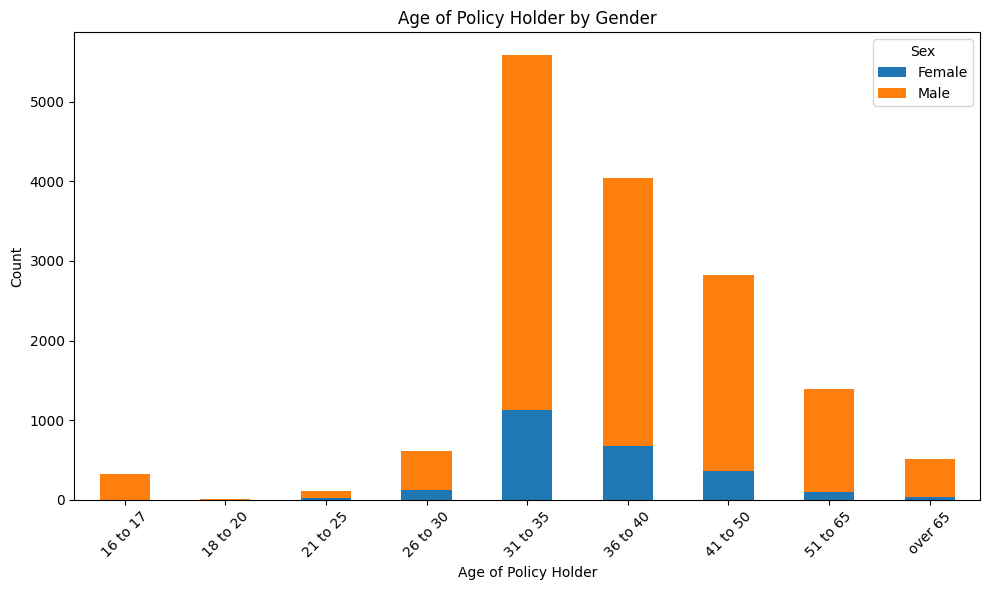

In [145]:
#Stacked Bar Chart

grouped_data = data.groupby(['AgeOfPolicyHolder', 'Sex']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title('Age of Policy Holder by Gender')
plt.xlabel('Age of Policy Holder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
